In [57]:
import requests
import pandas as pd
import numpy as np
import quandl
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Expand display screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [69]:
quandl.ApiConfig.api_key = "r_d9-mgZX7FE_-U-GxqY"

In [95]:
states = quandl.get('FMAC/HPI_ST_SA', start_date='2015-01-1', end_date='2021-4-30').reset_index()
states['Date'] =  pd.to_datetime(states['Date'])

In [96]:
northeast = states[['Date','Connecticut (CT)', 'Maine (ME)', 'Massachusetts (MA)', 'New Hampshire (NH)', 
                    'Rhode Island (RI)', 'Vermont (VT)', 'New Jersey (NJ)', 'New York (NY)', 'Pennsylvania (PA)']]
path = Path("Resources/northeast.csv")
northeast.to_csv(path, index = False)

In [97]:
midwest = states[['Date', 'Illinois (IL)', 'Indiana (IN)', 'Michigan (MI)', 'Ohio (OH)', 'Wisconsin (WI)', 
                 'Iowa (IA)', 'Kansas (KS)', 'Minnesota (MN)', 'Missouri (MO)', 'Nebraska (NE)', 'North Dakota (ND)', 'South Dakota (SD)']]
path = Path("Resources/midwest.csv")
midwest.to_csv(path, index = False)

In [98]:
south = states[['Date', 'Delaware (DE)', 'Florida (FL)', 'Georgia (GA)', 'Maryland (MD)', 'North Carolina (NC)', 
                'South Carolina (SC)', 'Virginia (VA)', 'District of Columbia (DC)', 'West Virginia (WV)',
               'Alabama (AL)', 'Kentucky (KY)', 'Mississippi (MS)', 'Tennessee (TN)', 'Arkansas (AR)', 'Louisiana (LA)', 
                'Oklahoma (OK)', 'Texas (TX)']]
path = Path("Resources/south.csv")
south.to_csv(path, index = False)

In [99]:
west = states[['Date', 'Arizona (AZ)', 'Colorado (CO)', 'Idaho (ID)', 'Montana (MT)', 'Nevada (NV)', 
               'New Mexico (NM)', 'Utah (UT)', 'Wyoming (WY)',
              'Alaska (AK)', 'California (CA)', 'Hawaii (HI)', 'Oregon (OR)', 'Washington (WA)']]
path = Path("Resources/west.csv")
west.to_csv(path, index = False)

# Import the Data from csv

In [100]:
# Set the Path to the resources folder

path = Path("Resources/northeast.csv")
northeast = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
northeast['Northeast'] = northeast.agg("mean", axis = "columns")

path = Path("Resources/west.csv")
west = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
west['West'] = west.agg("mean", axis = "columns")

path = Path("Resources/south.csv")
south = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
south['South'] = south.agg("mean", axis = "columns")

path = Path("Resources/midwest.csv")
midwest = pd.read_csv(path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
midwest['Midwest'] = midwest.agg("mean", axis = "columns")

In [101]:
df1 = pd.merge(northeast['Northeast'], west['West'], left_index = True, right_index = True)
df2 = pd.merge(south['South'], midwest['Midwest'], left_index = True, right_index = True)
df = pd.merge(df1, df2, left_index = True, right_index = True)
df

,Northeast,West,South,Midwest
Date,,,,
2015-01-31,148.054352,163.562046,150.356368,129.968599
2015-02-28,148.417480,164.272409,150.888578,130.258967
2015-03-31,148.876989,165.008630,151.404428,130.693993
2015-04-30,149.424277,165.871627,151.885438,131.173450
2015-05-31,150.029435,166.803787,152.503551,131.662758
...,...,...,...,...
2020-12-31,205.720768,248.168108,204.826643,176.805679
2021-01-31,207.834409,251.766864,206.569910,178.432480
2021-02-28,210.276411,255.857701,208.552010,180.278361


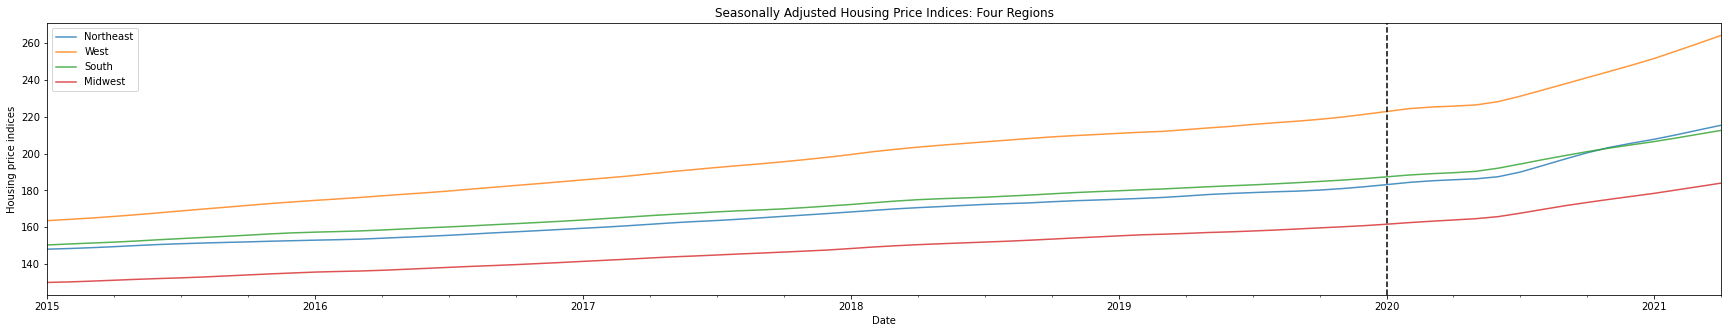

In [102]:
# Plot the Housing Index Throughout the time

df.plot(figsize = (30,5), 
        title = 'Seasonally Adjusted Housing Price Indices: Four Regions',
        ylabel = 'Housing price indices',
        legend = True,  
        alpha = 0.8)
plt.axvline(dt.datetime(2020, 1, 31), color = 'black', ls = '--')

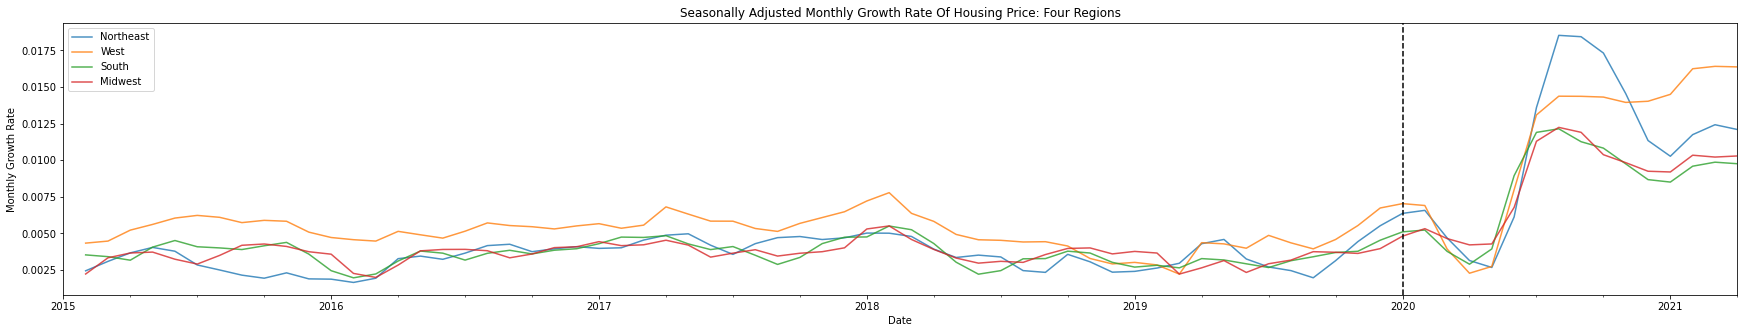

In [103]:
# Plot the Growth Rate Throughout the time

df_chg = df.pct_change()
df_chg.plot(figsize = (30,5), 
            title = 'Seasonally Adjusted Monthly Growth Rate Of Housing Price: Four Regions',
            ylabel = 'Monthly Growth Rate',
            legend = True,
            alpha = 0.8)
plt.axvline(dt.datetime(2020, 1, 31), color = 'black', ls = '--')